# DASC591 - Non-Thesis Master Term Project - (Titanic Dataset)

**Ersin SÖNMEZ** - Data Science - Koç University - 2022 Fall - ersinsonmez21@ku.edu.tr - (ID: 0079025)

## Step 1: Understand the Problem

The sinking of the "Titanic" is one of the most tragic tragedies in history. The tragedy took place on April 15th, 1912. The Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers. The numbers of survivors were low due to lack of lifeboats for all passangers. Some passengers were more likely to survive than others, such as women, children, and upper-class. This project analyzes what sorts of people were likely to survive this tragedy.

The dataset includes the following:

-------------------------------------------------------------------------------
- `Pclass`: Ticket class (1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class)
- `Sex`: Sex (Male, Female)
- `Age`: Age in years
- `SibSp`: Number of siblings / spouses aboard the Titanic
- `Parch`: Number of parents / children aboard the Titanic
- `Ticket`: Ticket number
- `Fare`: Passanger fare
- `Cabin`: Cabin number
- `Embarked`: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
-------------------------------------------------------------------------------
- `Target Class`: Survived (0 = No, 1 = Yes)
-------------------------------------------------------------------------------


Source: https://www.kaggle.com/competitions/titanic/data

## Step 2: Import Libraries and Datasets

Note: Don't forget to install the necessary packages with "pip install"!

In [558]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [609]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')

In [560]:
# Show the data head!
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [561]:
# Show the last ten rows!
titanic_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


**Extra Informations: Pandas Profiling**

In [562]:
# "Pandas Profiling" can be used for extra summary information!
# In the following sections, data will be continued to be analyzed and edited with coding pandas functions.

# ProfileReport(titanic_df, title="Pandas Profiling Report")

## Step 3: Perform Data Visualization

In [563]:
# Let's count the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived'] == 1]
no_survived_df = titanic_df[titanic_df['Survived'] == 0]

In [564]:
# Count the survived and deceased 
print("Total =", len(titanic_df))
print('----------------------------------------')
print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", "%", f'{(1. * len(survived_df) / len(titanic_df) * 100.0):.2f}')
print('----------------------------------------')
print("Number of passengers who did not survive =", len(no_survived_df))
print("Percentage who did not survive =", "%", f'{(1. * len(no_survived_df) / len(titanic_df) * 100.0):.2f}')

Total = 891
----------------------------------------
Number of passengers who survived = 342
Percentage Survived = % 38.38
----------------------------------------
Number of passengers who did not survive = 549
Percentage who did not survive = % 61.62


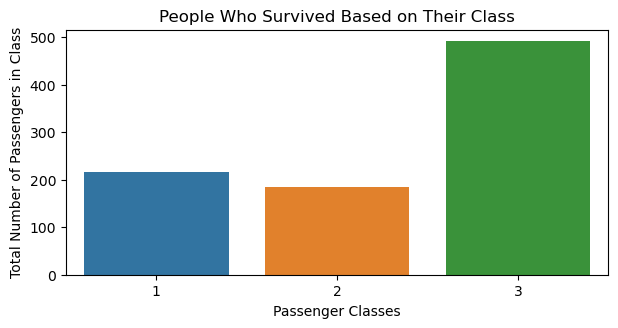

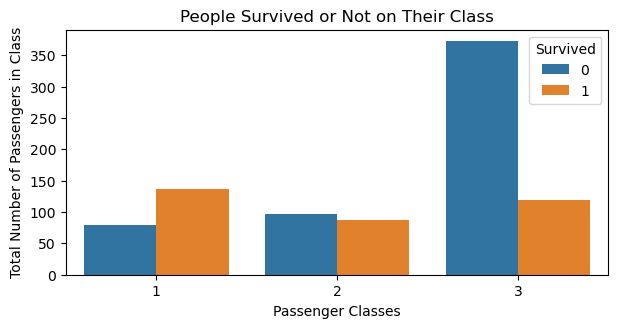

In [565]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival

plt.figure(figsize = [7,7])
plt.subplot(2,1,1)

sns.countplot(x = 'Pclass', data = titanic_df)
plt.xlabel('Passenger Classes')
plt.ylabel('Total Number of Passengers in Class')
plt.title('People Who Survived Based on Their Class')

plt.figure(figsize = [7,7])
plt.subplot(2,1,2)

sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)
plt.xlabel('Passenger Classes')
plt.ylabel('Total Number of Passengers in Class')
plt.title('People Survived or Not on Their Class')
plt.show()

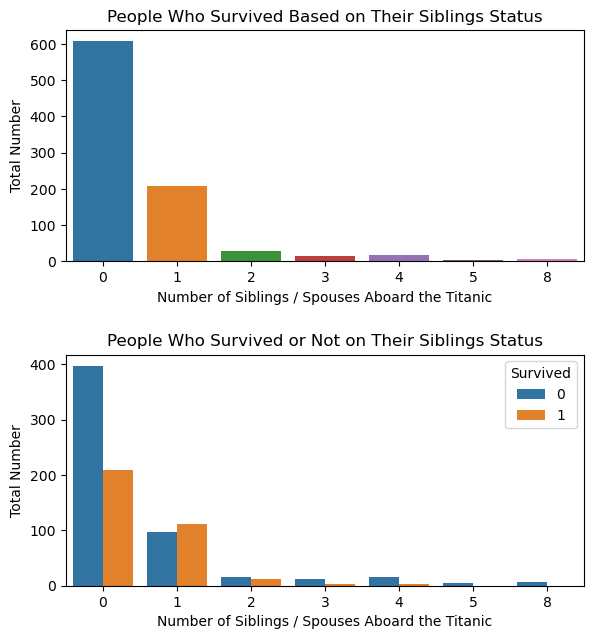

In [566]:
# Bar Chart to indicate the number of people who survived based on their siblings status
# Those who have one sibling seem to have a higher chance of survival than those without a sibling.

plt.figure(figsize = [7,7])
plt.subplot(2,1,1)
plt.tight_layout(pad = 5)


sns.countplot(x = 'SibSp', data = titanic_df)
plt.xlabel('Number of Siblings / Spouses Aboard the Titanic')
plt.ylabel('Total Number')
plt.title('People Who Survived Based on Their Siblings Status')

plt.subplot(2,1,2)
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df)
plt.xlabel('Number of Siblings / Spouses Aboard the Titanic')
plt.ylabel('Total Number')
plt.title('People Who Survived or Not on Their Siblings Status')
plt.legend(loc='upper right', title='Survived')
plt.show()

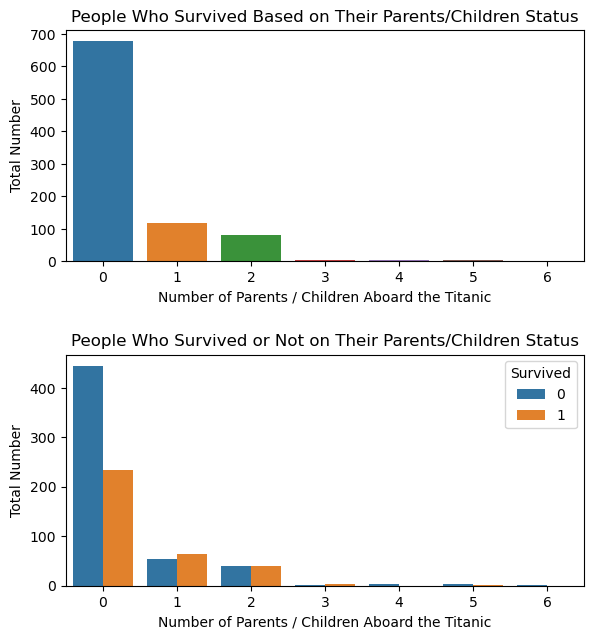

In [567]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)

plt.figure(figsize = [7,7])
plt.subplot(2,1,1)
plt.tight_layout(pad = 5)

sns.countplot(x = 'Parch', data = titanic_df)
plt.xlabel('Number of Parents / Children Aboard the Titanic')
plt.ylabel('Total Number')
plt.title('People Who Survived Based on Their Parents/Children Status')

plt.subplot(2,1,2)
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_df)
plt.xlabel('Number of Parents / Children Aboard the Titanic')
plt.ylabel('Total Number')
plt.title('People Who Survived or Not on Their Parents/Children Status')
plt.legend(loc='upper right', title='Survived')
plt.show()

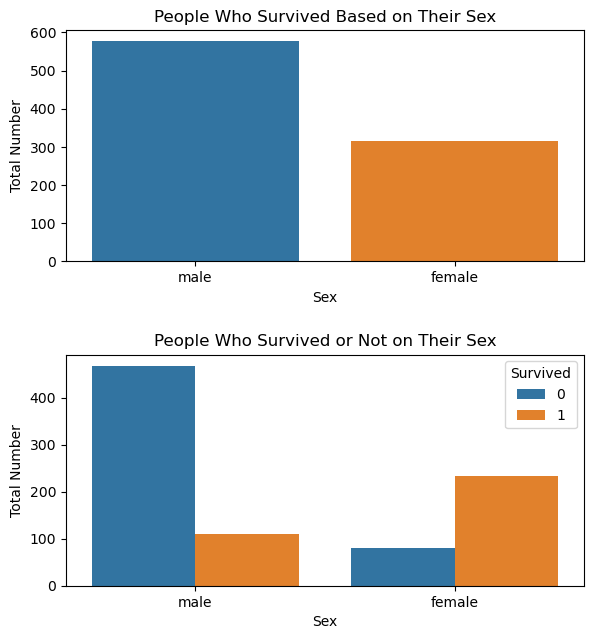

In [568]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other people!

plt.figure(figsize = [7,7])
plt.subplot(2,1,1)
plt.tight_layout(pad = 5)

sns.countplot(x = 'Sex', data = titanic_df)
plt.ylabel('Total Number')
plt.title('People Who Survived Based on Their Sex')

plt.subplot(2,1,2)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)
plt.ylabel('Total Number')
plt.title('People Who Survived or Not on Their Sex')
plt.show()

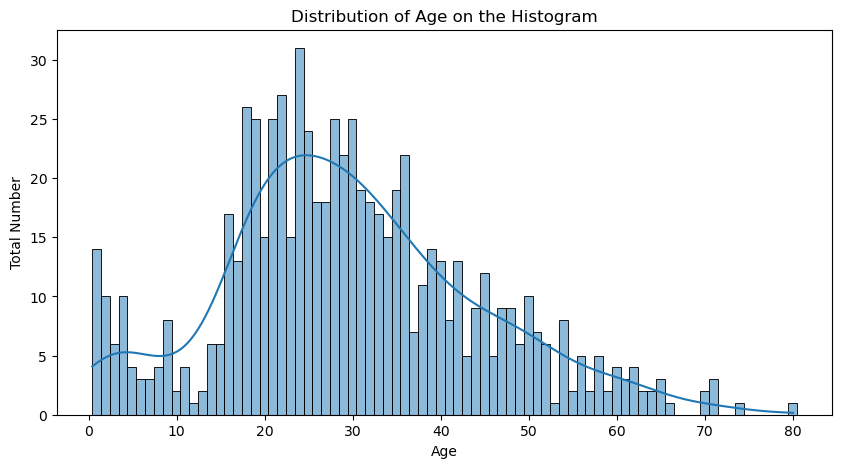

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [569]:
# Age Histogram 
plt.figure(figsize = [10,5])
sns.histplot(data = titanic_df, x="Age", binwidth=1, kde=True) # kde --> kernel density estimate (to smooth the histogram)
plt.ylabel('Total Number')
plt.title('Distribution of Age on the Histogram')
plt.show()

# Descriptive Statistics for "Age"
titanic_df['Age'].describe()

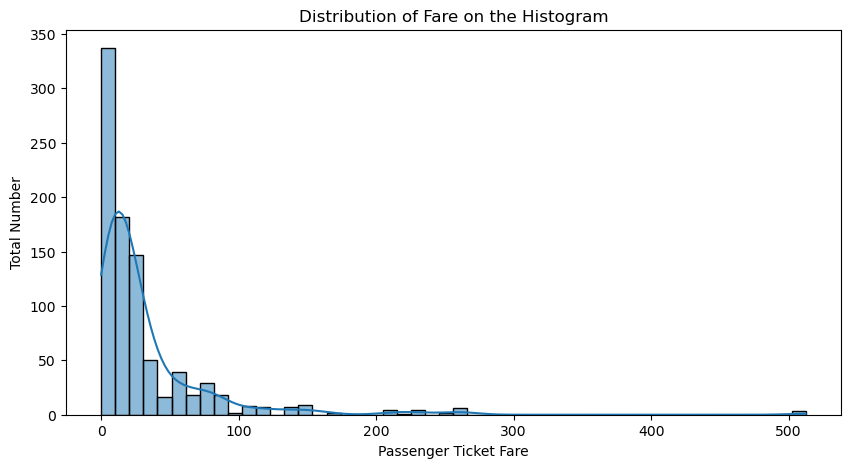

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [570]:
# Fare Histogram
# Many passengers showed interest in affordable tickets, 
# and very few (>500) bought expensive tickets (probably 1st class passengers)

plt.figure(figsize = [10,5])
sns.histplot(data = titanic_df, x="Fare", bins=50, kde=True) # kde --> kernel density estimate (to smooth the histogram)
plt.xlabel('Passenger Ticket Fare')
plt.ylabel('Total Number')
plt.title('Distribution of Fare on the Histogram')
plt.show()

# Descriptive Statistics for "Fare"
titanic_df['Fare'].describe()

## Step 4:  Perform Data Cleaning and Feature Engineering

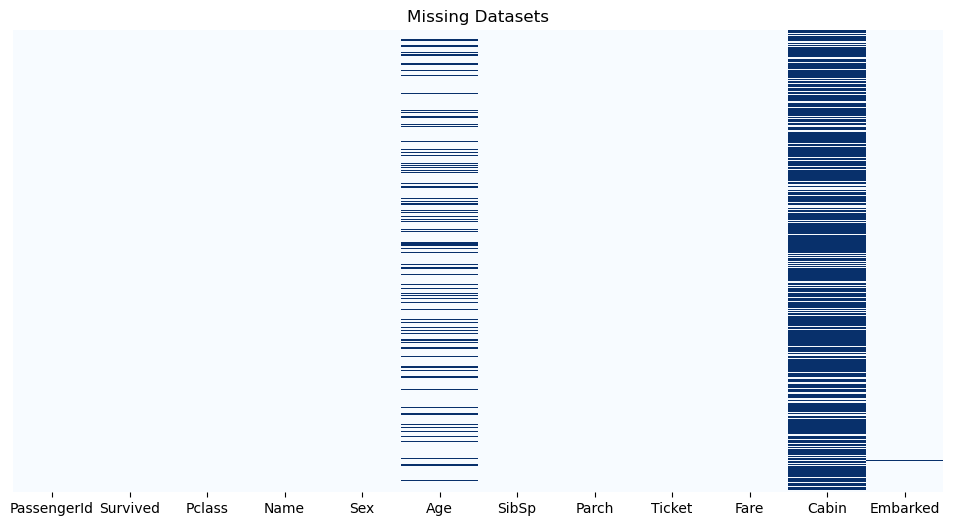

In [571]:
# Let's explore which dataset is missing
plt.figure(figsize = [12,6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.title('Missing Datasets')
plt.show()

In [572]:
# Let's drop the cabin coloumn and test with inplace = true and false
titanic_df.drop('Cabin', axis = 1, inplace = True)

In [573]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [574]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [575]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


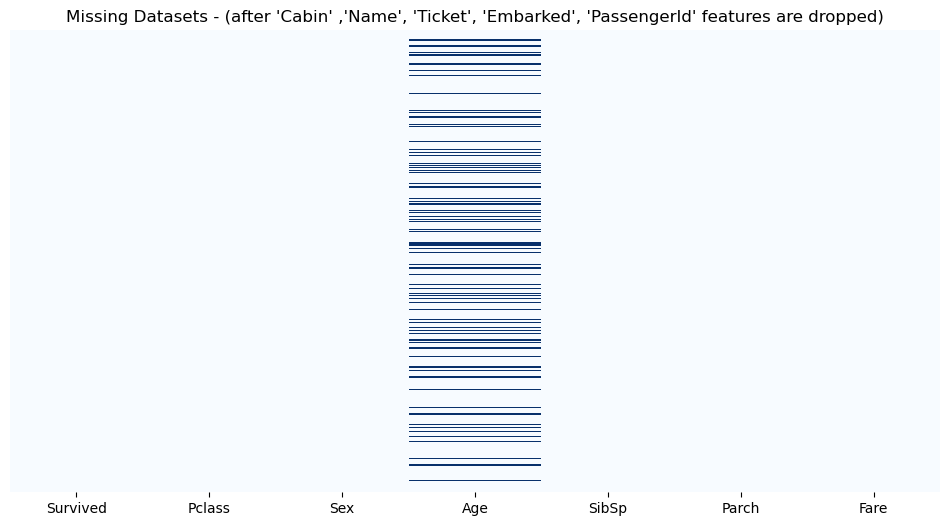

In [576]:
# Let's view the data one more time!
plt.figure(figsize = [12,6])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.title("Missing Datasets - (after 'Cabin' ,'Name', 'Ticket', 'Embarked', 'PassengerId' features are dropped)")
plt.show()

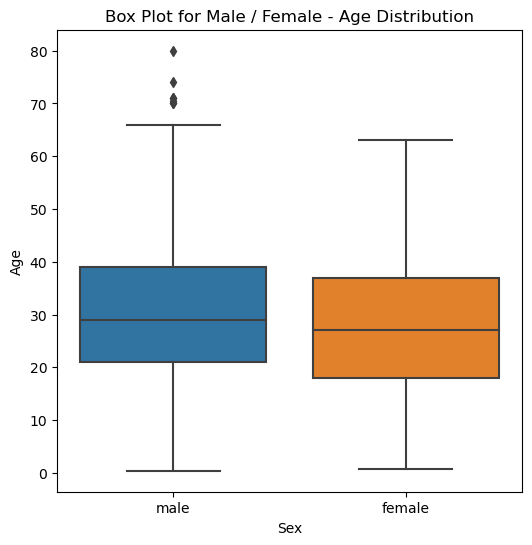

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [577]:
# Let's examine the male and female age distributions on the box plot!
plt.figure(figsize=(6, 6))

sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)
plt.title('Box Plot for Male / Female - Age Distribution')
plt.show()

# Descriptive Statistics for "Sex"
titanic_df.groupby("Sex").Age.describe()

In [578]:
# This function was created to handle missing values, it writes averages to blank data for both genders.
# Let's get the average age for female (~28) and male (~31)
 
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex =='male':
            return 31
        else:
            return 28
    else:
        return age

In [579]:
titanic_df['Age'] = titanic_df[['Age','Sex']].apply(Fill_Age, axis = 1)

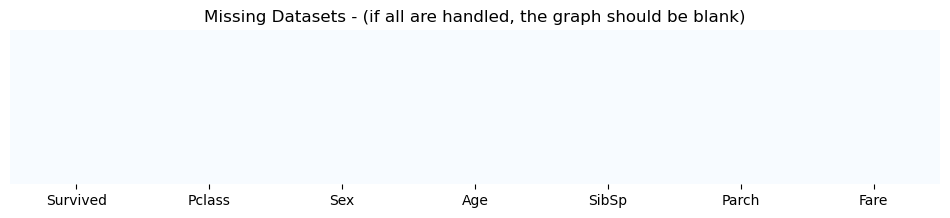

In [580]:
# Let's view the data one more time! (to verify that there is no missing data)
plt.figure(figsize = [12,2])
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
plt.title("Missing Datasets - (if all are handled, the graph should be blank)")
plt.show()

In [581]:
# You just need one column only to represent male or female
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [582]:
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [583]:
# first let's drop the "Sex" column
titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [584]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [585]:
# Now let's add the encoded column male again
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [586]:
# Finally, a fully numeric dataframe with preprocessing completed and missing values handled!
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,28.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


## Step 5: Drop the Target Column Before Splitting

In [587]:
#Let's drop the target coloumn before we do train test split
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values

## Step 6: Train Logistic Regression Classifier Model

In [588]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [589]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=10)

## Step 7: Assess Trained Model Performance for Logistic Regression

In [590]:
y_predict_test = classifier.predict(X_test)

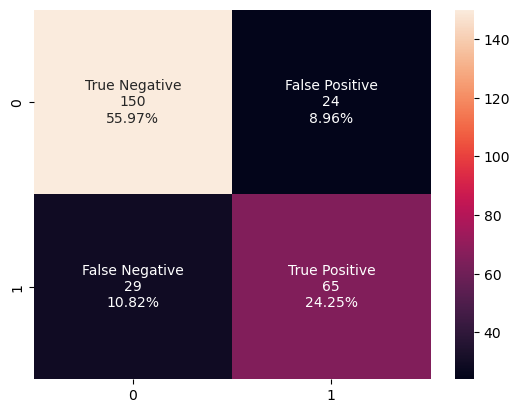

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       174
           1       0.73      0.69      0.71        94

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [591]:
cm = confusion_matrix(y_test, y_predict_test) #cm --> confusion matrix

######## labels and percentages ########
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
######## labels and percentages ########

sns.heatmap(cm, annot = labels, fmt = "")
plt.show()

print(classification_report(y_test, y_predict_test))

In [592]:
accuracy_score_logistic_regression = round(accuracy_score(y_test, y_predict_test),3)
print('Logistic Regression --> Accuracy Score:',accuracy_score_logistic_regression)

Logistic Regression --> Accuracy Score: 0.802


## Step 8: Train Naive Bayes Classifier Model

In [593]:
classifier = MultinomialNB() #Naive Bayes
classifier.fit(X_train, y_train)

MultinomialNB()

## Step 9: Assess Trained Model Performance for Naive Bayes

In [594]:
y_predict_test = classifier.predict(X_test)

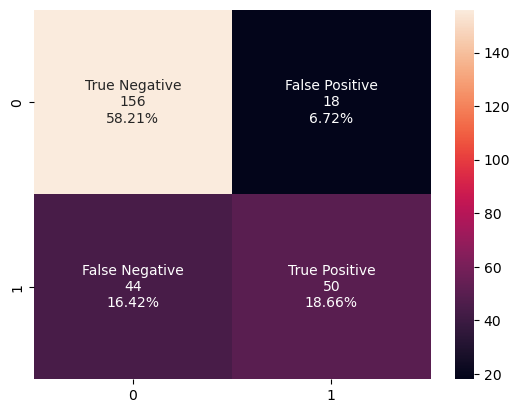

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       174
           1       0.74      0.53      0.62        94

    accuracy                           0.77       268
   macro avg       0.76      0.71      0.73       268
weighted avg       0.76      0.77      0.76       268



In [595]:
cm = confusion_matrix(y_test, y_predict_test) #cm --> confusion matrix

######## labels and percentages ########
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
######## labels and percentages ########

sns.heatmap(cm, annot = labels, fmt = "")
plt.show()

print(classification_report(y_test, y_predict_test))

In [596]:
accuracy_score_naive_bayes = round(accuracy_score(y_test, y_predict_test),3)
print('Naive Bayes --> Accuracy Score:',accuracy_score_naive_bayes)

Naive Bayes --> Accuracy Score: 0.769


## Step 10: Train Decision Tree Classifier Model

In [597]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

## Step 11: Assess Trained Model Performance for Decision Tree

In [598]:
y_predict_test = classifier.predict(X_test)

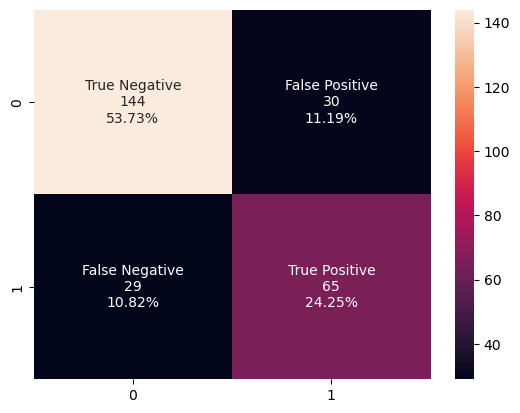

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       174
           1       0.68      0.69      0.69        94

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



In [599]:
cm = confusion_matrix(y_test, y_predict_test) #cm --> confusion matrix

######## labels and percentages ########
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
######## labels and percentages ########

sns.heatmap(cm, annot = labels, fmt = "")
plt.show()

print(classification_report(y_test, y_predict_test))

In [600]:
accuracy_score_decision_tree = round(accuracy_score(y_test, y_predict_test),3)
print('Decision Tree (unoptimized) --> Accuracy Score:',accuracy_score_decision_tree)

Decision Tree (unoptimized) --> Accuracy Score: 0.78


## Step 12: Hyperparameter Tuning for Decision Tree (GridSearchCV)

In [601]:
# Creating a dictionary of parameters to use in GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

classifier = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5, # cross-validation
    n_jobs=5,
    verbose=1,
)

classifier.fit(X_train, y_train)
print(classifier.best_params_) # Optimized hyperparameters

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 6, 'max_features': 0.8, 'splitter': 'random'}


## Step 13: Train Decision Tree Classifier Model with Optimized Hyperparameter

In [602]:
classifier = DecisionTreeClassifier(max_depth=classifier.best_params_['max_depth'], criterion=classifier.best_params_['criterion'], max_features=classifier.best_params_['max_features'], splitter=classifier.best_params_['splitter'])
classifier.fit(X_train, y_train)
y_predict_test = classifier.predict(X_test)

## Step 14: Optimized Trained Model Performance for Decision Tree

In [603]:
y_predict_test = classifier.predict(X_test)

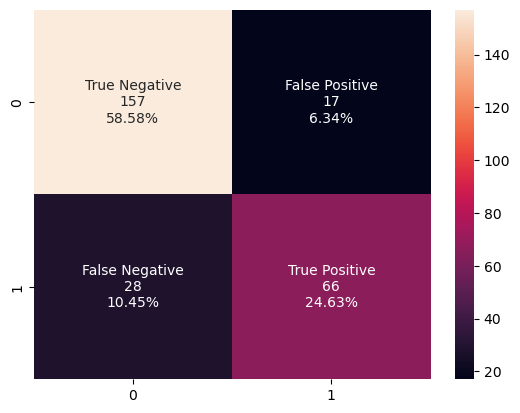

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       174
           1       0.80      0.70      0.75        94

    accuracy                           0.83       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.83      0.83      0.83       268



In [604]:
cm = confusion_matrix(y_test, y_predict_test) #cm --> confusion matrix

######## labels and percentages ########
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
######## labels and percentages ########

sns.heatmap(cm, annot = labels, fmt = "")
plt.show()

print(classification_report(y_test, y_predict_test))

In [605]:
accuracy_score_decision_tree_optimized = round(accuracy_score(y_test, y_predict_test),3)
print('Decision Tree (optimized) --> Accuracy Score:',accuracy_score_decision_tree_optimized)

Decision Tree (optimized) --> Accuracy Score: 0.832


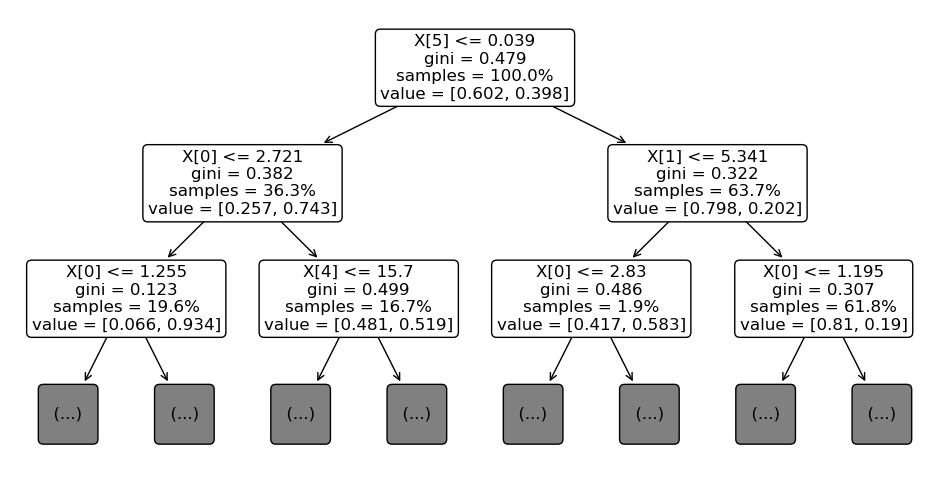

In [606]:
plt.figure(figsize=(12, 6))
tree.plot_tree(classifier,max_depth=2,fontsize=12,proportion=True,rounded=True)
plt.show()

## Step 15: Comparison of Classifier Models and Results

In [607]:
print('\n','------ Comparison -------','\n')
print('- Logistic Regression --> Accuracy Score:',accuracy_score_logistic_regression)
print('- Naive Bayes --> Accuracy Score:',accuracy_score_naive_bayes)
print('- Decision Tree (unoptimized) --> Accuracy Score:',accuracy_score_decision_tree)
print('- Decision Tree (optimized) --> Accuracy Score:',accuracy_score_decision_tree_optimized)
print('\n','----- End of Script -----','\n')


 ------ Comparison ------- 

- Logistic Regression --> Accuracy Score: 0.802
- Naive Bayes --> Accuracy Score: 0.769
- Decision Tree (unoptimized) --> Accuracy Score: 0.78
- Decision Tree (optimized) --> Accuracy Score: 0.832

 ----- End of Script ----- 

